# load & data explorations

In [ ]:
import pandas as pd

In [ ]:
# Load user based dataset
dwn_url='https://drive.google.com/uc?id=' + '1aOp2O05fRrCFAIO6Nh568LRkcs28Qmfp'
df_user = pd.read_csv(dwn_url)

# Load content based dataset
dwn_url='https://drive.google.com/uc?id=' + '10ult8738NgSNxON0EUEL0yy45s-pvWao'
df_content = pd.read_csv(dwn_url)


In [ ]:
df_user.Aver_tweets_per_day.sum()/len(df_user)

9.403632100174795

In [ ]:
df_user

,Unnamed: 0,Id,Total_of_tweets,No_of_followers,No_of_followees,Age_of_user,No_of_favorite,No_groups_user,Aver_favou_per_day,Aver_tweets_per_day,User_name_len,Verified
0,0,1194450906256826368,838,41,76,953,232,0,0.043022,0.879328,9,0
1,1,335110358,22597,790,457,3997,266,0,0.197648,5.653490,6,0
2,2,154825883,2438,1895,481,4394,1122,8,0.431270,0.554848,10,0
3,3,1197373765430046725,1071,39,331,945,4080,0,0.041270,1.133333,8,0
4,4,970324097098854400,4051,8898,279,1572,5558,6,5.660305,2.576972,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1838,1838,31367292,8902,338,281,4817,130,4,0.070168,1.848038,12,0
1839,1839,24363992,5587,265,344,4849,913,0,0.054650,1.152196,8,0
1840,1840,18759610,78472,294,137,4914,59,7,0.059829,15.969068,8,0
1841,1841,25039638,20698,641,384,4845,1265,4,0.132301,4.272033,15,0


In [ ]:
df_content

,tweet_stopword,Sentimen,contain_location,contain_rt_term
0,uang negara alokasi proyek kereta api cepat ja...,-1,1,0
1,studi layak kereta api cepat jakarta bandung g...,0,1,0
2,nusantara blues for kereta cepat moving indone...,0,1,1
3,ken denger lu nyinyirin jht langka minyak gore...,-1,1,0
4,mohon info kaji layak kereta api cepat jakarta...,0,1,0
...,...,...,...,...
5869,lihat orang butuh kereta cepat jkt padalarang ...,1,1,0
5870,ibukota pindah tp kereta cepat spertinya kebut...,-1,0,0
5871,perintah kaji ulang proyek kereta cepat jakart...,0,1,0
5872,tukang las rel kereta cepat china pks fenomena...,0,1,0


In [ ]:
df_content.contain_rt_term.value_counts()

0    4772
1    1102
Name: contain_rt_term, dtype: int64

# Preprocessing

In [ ]:
df_merge =

## Content Based

In [ ]:
# Remove null values
df_content_new = df_content.dropna(axis=0, how='any')
df_content_new

,tweet_stopword,Sentimen,contain_location,contain_rt_term
0,uang negara alokasi proyek kereta api cepat ja...,-1,1,0
1,studi layak kereta api cepat jakarta bandung g...,0,1,0
2,nusantara blues for kereta cepat moving indone...,0,1,1
3,ken denger lu nyinyirin jht langka minyak gore...,-1,1,0
4,mohon info kaji layak kereta api cepat jakarta...,0,1,0
...,...,...,...,...
5869,lihat orang butuh kereta cepat jkt padalarang ...,1,1,0
5870,ibukota pindah tp kereta cepat spertinya kebut...,-1,0,0
5871,perintah kaji ulang proyek kereta cepat jakart...,0,1,0
5872,tukang las rel kereta cepat china pks fenomena...,0,1,0


In [ ]:
# Remove duplicate
df_content_dup = df_content_new.drop_duplicates(subset=["tweet_stopword"], keep=False)

In [ ]:
# Create opt_length feature
import string

def countChar(sentence):
  translator = str.maketrans("", "", string.punctuation + " ")
  filtered_text = sentence.translate(translator)
  count = len(filtered_text)
  return count

opt = []
for i in range(len(df_content_dup)):
  sent = countChar(df_content_dup.tweet_stopword.iloc[i])
  if sent >= 70 and sent <=100:
    opt.append(1)
  else:
    opt.append(0)

df_content_dup['opt_length'] = opt

<ipython-input-5-fc03a9ec81fa>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_dup['opt_length'] = opt


In [ ]:
df_coba = df_content_dup.copy()

In [ ]:
df_coba

,tweet_stopword,Sentimen,contain_location,contain_rt_term,opt_length
0,uang negara alokasi proyek kereta api cepat ja...,-1,1,0,0
1,studi layak kereta api cepat jakarta bandung g...,0,1,0,0
2,nusantara blues for kereta cepat moving indone...,0,1,1,0
3,ken denger lu nyinyirin jht langka minyak gore...,-1,1,0,1
4,mohon info kaji layak kereta api cepat jakarta...,0,1,0,0
...,...,...,...,...,...
5866,salah rakyat bayar pajak contoh sedia moda tra...,-1,1,0,1
5868,kereta cepat ngak pakai apbn,0,0,0,0
5869,lihat orang butuh kereta cepat jkt padalarang ...,1,1,0,1
5870,ibukota pindah tp kereta cepat spertinya kebut...,-1,0,0,0


In [ ]:
text_data = df_coba.tweet_stopword
add_fitur = df_coba.drop(['tweet_stopword', 'opt_length'], axis=1)
label = df_coba.opt_length

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion, Pipeline

vectorizer = TfidfVectorizer()
text_features = vectorizer.fit_transform(text_data)

combined_features = FeatureUnion([('text_features', text_features),
                                 ('additional_features', add_fitur)])

In [ ]:
combined_features

FeatureUnion(transformer_list=[('text_features',
                                <4477x6372 sparse matrix of type '<class 'numpy.float64'>'
	with 59459 stored elements in Compressed Sparse Row format>),
                               ('additional_features',
                                      Sentimen  contain_location  contain_rt_term
0           -1                 1                0
1            0                 1                0
2            0                 1                1
3           -1                 1                0
4            0                 1                0
...        ...               ...              ...
5866        -1                 1                0
5868         0                 0                0
5869         1                 1                0
5870        -1                 0                0
5873         0                 1                0

[4477 rows x 3 columns])])

## User Based

retwet berdasarkan Total_of_tweets, No_of_followers, Aver_favou_per_day, dan Aver_tweets_per_day diatas rata2

In [ ]:
# Create retweet feature
retweet = []
n = len(df_user)
tweet = df_user.Total_of_tweets.sum()/n
foll = df_user.No_of_followers.sum()/n
fav = df_user.Aver_favou_per_day.sum()/n
tweet_per_day = df_user.Aver_tweets_per_day.sum()/n
for i in range(n):
  if df_user.Total_of_tweets[i] > tweet and df_user.No_of_followers[i] > foll and df_user.Aver_favou_per_day[i] > fav and df_user.Aver_tweets_per_day[i] > tweet_per_day:
    retweet.append(1)
  else:
    retweet.append(0)

df_user['retweet'] = retweet

In [ ]:
# Drop unused features
df_user = df_user.drop(['Unnamed: 0', 'Id', 'No_groups_user', 'Age_of_user', 'User_name_len'], axis=1)

In [ ]:
# Normalizations
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_user_norm = df_user.drop(['Verified', 'retweet'], axis=1)
df_user_norm = pd.DataFrame(scaler.fit_transform(df_user_norm), columns=df_user_norm.columns)

In [ ]:
df_user_norm['Verified'] = df_user['Verified'].copy()
df_user_norm['retweet'] = df_user['retweet'].copy()

In [ ]:
df_user_norm.retweet.value_counts()

0    1793
1      50
Name: retweet, dtype: int64

In [ ]:
# Check null values
df_user_norm.isnull().sum()

Total_of_tweets        0
No_of_followers        0
No_of_followees        0
No_of_favorite         0
Aver_favou_per_day     0
Aver_tweets_per_day    0
Verified               0
retweet                0
dtype: int64

In [ ]:
# Check Duplicated data
df_user_norm[df_user_norm.duplicated()]

,Total_of_tweets,No_of_followers,No_of_followees,No_of_favorite,Aver_favou_per_day,Aver_tweets_per_day,Verified,retweet


## Merge Data

In [ ]:
df_temp = df_content_dup.sample(len(df_user_norm)).reset_index(drop=True)
df_temp.Sentimen.value_counts()

 0    958
-1    649
 1    236
Name: Sentimen, dtype: int64

In [ ]:
df_temp

,tweet_stopword,Sentimen,contain_location,contain_rt_term,opt_length
0,mardani ali duga anggar pindah ikn skema keret...,0,1,0,0
1,unjung proyek kereta cepat indonesia jakarta b...,0,1,0,0
2,x lipat harga kereta cepat jakarta bandung,0,1,0,0
3,klo argumen takut biaya bengkak kereta api cep...,-1,0,0,1
4,jakarta proyek bangun kereta cepat jakarta ban...,0,1,0,0
...,...,...,...,...,...
1838,proyek kereta api jakarta bandung kebut layan ...,1,1,1,0
1839,faisal basri proyek kereta cepat tolak rapat k...,-1,0,0,0
1840,to apbn repot pmn kpd proyek maaf sy tdk maaf ...,-1,1,1,1
1841,harap dgn selesai kereta cepat jakarta bandung...,1,1,1,0


In [ ]:
df_merge = df_user_norm.copy()
df_merge['Sentimen'] = df_temp['Sentimen']
df_merge['contain_location'] = df_temp['contain_location']
df_merge['contain_rt_term'] = df_temp['contain_rt_term']
df_merge['opt_length'] = df_temp['opt_length']
df_merge

,Total_of_tweets,No_of_followers,No_of_followees,No_of_favorite,Aver_favou_per_day,Aver_tweets_per_day,Verified,retweet,Sentimen,contain_location,contain_rt_term,opt_length
0,0.000386,2.876355e-07,0.000088,0.000458,4.568102e-07,0.000576,0,0,0,1,0,0
1,0.010415,5.957082e-06,0.000528,0.000525,2.123619e-06,0.003703,0,0,0,1,0,0
2,0.001124,1.432122e-05,0.000556,0.002214,4.641966e-06,0.000363,0,0,0,1,0,0
3,0.000494,2.724968e-07,0.000382,0.008051,4.379222e-07,0.000742,0,0,-1,0,0,1
4,0.001867,6.732941e-05,0.000322,0.010968,6.100887e-05,0.001688,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1838,0.004103,2.535734e-06,0.000325,0.000257,7.494344e-07,0.001210,0,0,1,1,1,0
1839,0.002575,1.983171e-06,0.000397,0.001802,5.821597e-07,0.000755,0,0,-1,0,0,0
1840,0.036168,2.202682e-06,0.000158,0.000116,6.379832e-07,0.010460,0,0,-1,1,1,1
1841,0.009540,4.829249e-06,0.000444,0.002496,1.419205e-06,0.002798,0,0,1,1,1,0


In [ ]:
df_merge.to_csv('DatasetMerge.csv')

# Built Model

In [ ]:
!pip install harmonypy

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import harmonypy as hm
import random

## Hyperparameter Tuning

In [ ]:
# Define the objective function to train and evaluate the ANN
def objective_function(params, X_train, X_test,  y_train, y_test):
  learning_rate, batch_size, hidden_units, dropout_rate = params

  # Initialize the ANN model with the given hyperparameters
  model = MLPClassifier(
      hidden_layer_sizes=(int(hidden_units),),
      learning_rate_init=learning_rate,
      batch_size=int(batch_size),
      alpha=0.0001,
      activation='relu',
      solver='adam', # bisa diganti pake sgd
      max_iter=100,
      random_state=42
  )

  # Train the model on the training set
  model.fit(X_train, y_train)

  # Evaluate the model on the validation set
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  return accuracy

In [ ]:
# Define the Harmony Search algorithm
def harmony_search(objective_function, parameter_ranges, harmony_memory_size, max_iterations, X_train, X_test,  y_train, y_test):
    num_variables = len(parameter_ranges)

    # Initialize harmony memory
    harmony_memory = []
    for _ in range(harmony_memory_size):
        harmony = [random.uniform(range_[0], range_[1]) for range_ in parameter_ranges]
        harmony_memory.append(harmony)

    # Main loop
    best_solution = None
    best_objective = float('-inf')
    iteration = 0
    # print('List Parameter : \n')
    while iteration < max_iterations:
        new_harmony = []

        # Generate a new harmony
        for i in range(num_variables):
            if random.random() < 0.5:
                # Explore a random value
                new_value = random.uniform(parameter_ranges[i][0], parameter_ranges[i][1])
            else:
                # Exploit the best value from harmony memory
                random_index = random.randint(0, harmony_memory_size - 1)
                new_value = harmony_memory[random_index][i]

            new_harmony.append(new_value)
            # print(new_value)

        # Evaluate the new harmony

        objective = objective_function(new_harmony, X_train, X_test,  y_train, y_test)
        # print('================')

        # Update the harmony memory
        worst_index = np.argmin([objective_function(harmony, X_train, X_test,  y_train, y_test) for harmony in harmony_memory])

        if objective > objective_function(harmony_memory[worst_index], X_train, X_test,  y_train, y_test):
            harmony_memory[worst_index] = new_harmony

        # Update the best solution
        if objective > best_objective:
            best_solution = new_harmony
            best_objective = objective

        # Increment the iteration counter
        iteration += 1

    return best_solution, best_objective

In [ ]:
def hyperparameter_tuning(X_train, X_test,  y_train, y_test, harmony_search):
  parameter_ranges = [
      # Ini bisa disetting aja buat lebih improve lagi modelnya terutama buat yang content based karena di content based fitur yang digunakan tidak terlalu baik
      # Jadi perlu penyesuaian
      (0.001, 0.1),  # Learning rate
      (32, 128),     # Batch size
      (64, 256),     # Number of hidden units
      (0.1, 0.5)     # Dropout rate
  ]
  harmony_memory_size = 10
  max_iterations = 5

  best_solution, best_objective = harmony_search(objective_function, parameter_ranges, harmony_memory_size, max_iterations, X_train, X_test,  y_train, y_test)

  return best_solution

In [ ]:
# Function Oversampling using SMOTE
def oversampling(X, y):
  smote = SMOTE()
  X_resampled, y_resampled = smote.fit_resample(X, y)
  return X_resampled, y_resampled

In [ ]:
# Model ANN
def ann_model(X_train, X_test,  y_train, y_test, hyperparameter_tuning):
  learning_rate, batch_size, hidden_units, dropout_rate = hyperparameter_tuning(X_train, X_test,  y_train, y_test, harmony_search)
  model = MLPClassifier(
        hidden_layer_sizes=(int(hidden_units),),
        learning_rate_init=learning_rate,
        batch_size=int(batch_size),
        alpha=0.0001,
        activation='relu',
        solver='adam',
        max_iter=100,
        random_state=42
    )
  model = model.fit(X_train, y_train)
  return model

# Evaluate Model

In [ ]:
def evaluate_model(model, X_test, y_test):
  # Prediksi pada data uji
  y_pred = model.predict(X_test)

  # Menghitung metrik evaluasi
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  # Menampilkan hasil evaluasi
  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1-Score:", f1)

  # Menampilkan laporan klasifikasi
  print(classification_report(y_test, y_pred))

  # Menghitung confusion matrix
  cm = confusion_matrix(y_test, y_pred)

  # Menampilkan confusion matrix dalam bentuk visual
  labels = np.unique(y_test)
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Confusion Matrix")
  plt.colorbar()
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels)
  plt.yticks(tick_marks, labels)
  plt.xlabel("Prediksi")
  plt.ylabel("Nilai Sebenarnya")

  # Menampilkan angka pada matriks
  thresh = cm.max() / 2.
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          plt.text(j, i, format(cm[i, j], 'd'),
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")

  plt.show()

In [ ]:
X_merge = df_merge.drop('retweet', axis=1)
y_merge = df_merge.retweet
X_merge_resampled, y_merge_resampled = oversampling(X_merge, y_merge)

# Main code

In [ ]:
X_train_coba, X_test_coba, y_train_coba, y_test_coba = train_test_split(combined_features, label, test_size=0.3, random_state=42)

In [ ]:
# Init Variable
X_content = df_content_dup.drop(['tweet_stopword', 'opt_length'], axis=1)
y_content = df_content_dup.opt_length
X_user = df_user_norm.drop('retweet', axis=1)
y_user = df_user_norm.retweet
X_content_resampled, y_content_resampled = oversampling(X_content, y_content)
X_user_resampled, y_user_resampled = oversampling(X_user, y_user)

In [ ]:
X_merge = df_merge.drop('retweet', axis=1)
y_merge = df_merge.retweet
X_merge_resampled, y_merge_resampled = oversampling(X_merge, y_merge)

In [ ]:
# Splitting data
X_train_content, X_test_content, y_train_content, y_test_content = train_test_split(X_content, y_content, test_size=0.2, random_state=42)
X_train_user, X_test_user, y_train_user, y_test_user = train_test_split(X_user, y_user, test_size=0.2, random_state=42)
X_train_content_over, X_test_content_over, y_train_content_over, y_test_content_over = train_test_split(X_content_resampled, y_content_resampled, test_size=0.4, random_state=0)
X_train_user_over, X_test_user_over, y_train_user_over, y_test_user_over = train_test_split(X_user_resampled, y_user_resampled, test_size=0.4, random_state=42)

In [ ]:
X_train_merge_over, X_test_merge_over, y_train_merge_over, y_test_merge_over = train_test_split(X_merge_resampled, y_merge_resampled, test_size=0.3, random_state=0)

In [ ]:
# Call ann model
# model_content = ann_model(X_train_content, X_test_content, y_train_content, y_test_content, hyperparameter_tuning)
# model_user = ann_model(X_train_user, X_test_user, y_train_user, y_test_user, hyperparameter_tuning)
model_content_over = ann_model(X_train_content_over.reset_index(drop=True), X_test_content_over.reset_index(drop=True), y_train_content_over.reset_index(drop=True), y_test_content_over.reset_index(drop=True), hyperparameter_tuning)
# model_user_over = ann_model(X_train_user_over.reset_index(drop=True), X_test_user_over.reset_index(drop=True), y_train_user_over.reset_index(drop=True), y_test_user_over.reset_index(drop=True), hyperparameter_tuning)

In [ ]:
model_merge_over = ann_model(X_train_merge_over.reset_index(drop=True), X_test_merge_over.reset_index(drop=True), y_train_merge_over.reset_index(drop=True), y_test_merge_over.reset_index(drop=True), hyperparameter_tuning)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [ ]:
y_test_content_over.value_counts()

0    1392
1    1286
Name: opt_length, dtype: int64

In [ ]:
# Evaluate model
# evaluate_model(model_content, X_test_content, y_test_content)
# evaluate_model(model_user, X_test_user, y_test_user)
evaluate_model(model_content_over, X_test_content_over.reset_index(drop=True), y_test_content_over.reset_index(drop=True))
# evaluate_model(model_user_over, X_test_user_over.reset_index(drop=True), y_test_user_over.reset_index(drop=True))

Accuracy: 0.9953531598513011
Precision: 0.9962616822429906
Recall: 0.9944029850746269
F1-Score: 0.9953314659197013
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       540
           1       1.00      0.99      1.00       536

    accuracy                           1.00      1076
   macro avg       1.00      1.00      1.00      1076
weighted avg       1.00      1.00      1.00      1076



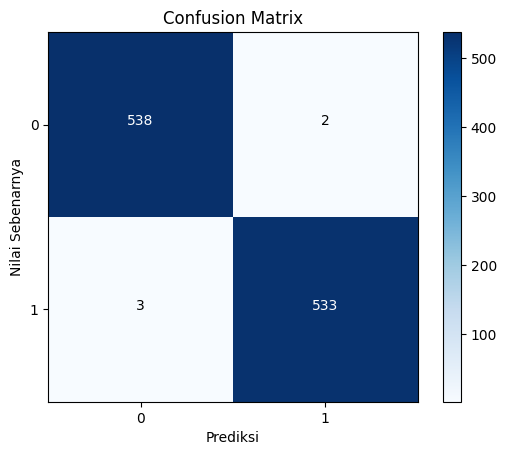

In [ ]:
evaluate_model(model_merge_over, X_test_merge_over.reset_index(drop=True), y_test_merge_over.reset_index(drop=True))

# Tanpa Hyperparameter Tuning

In [ ]:
# Model ANN
def ann_model_not(X_train, y_train):
  # learning_rate, batch_size, hidden_units, dropout_rate = hyperparameter_tuning(X_train, X_test,  y_train, y_test, harmony_search)
  model = MLPClassifier(
        hidden_layer_sizes=(12, 64),
        learning_rate_init=0.1,
        batch_size=20,
        alpha=0.0001,
        activation='relu',
        solver='adam',
        max_iter=100,
        random_state=42
    )
  model = model.fit(X_train, y_train)
  return model

Accuracy: 0.9846689895470383
Precision: 0.9732770745428974
Recall: 0.99568345323741
F1-Score: 0.984352773826458
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       740
           1       0.97      1.00      0.98       695

    accuracy                           0.98      1435
   macro avg       0.98      0.99      0.98      1435
weighted avg       0.98      0.98      0.98      1435



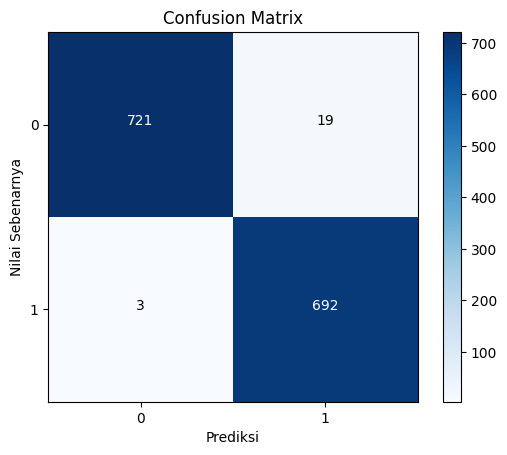

In [ ]:
# User Based dengan oversampling
model_user_over = ann_model_not(X_train_user_over.reset_index(drop=True), y_train_user_over.reset_index(drop=True))
evaluate_model(model_user_over, X_test_user_over.reset_index(drop=True), y_test_user_over.reset_index(drop=True))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

Accuracy: 0.975609756097561
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       360
           1       0.00      0.00      0.00         9

    accuracy                           0.98       369
   macro avg       0.49      0.50      0.49       369
weighted avg       0.95      0.98      0.96       369



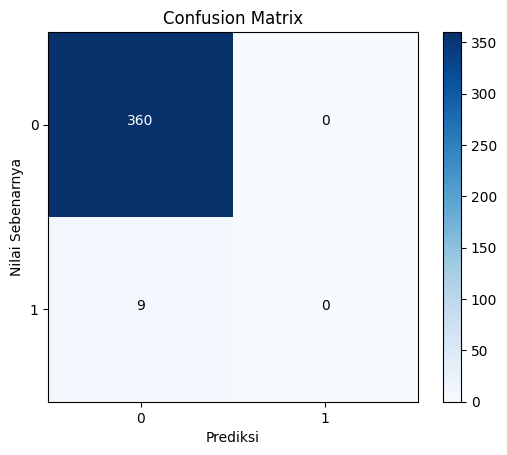

In [ ]:
# User Based tanpa oversampling
model_user = ann_model_not(X_train_user, y_train_user)
evaluate_model(model_user, X_test_user, y_test_user)

In [ ]:
X_train_content_over.reset_index(drop=True)

,Sentimen,contain_location,contain_rt_term
0,0,1,0
1,0,1,0
2,0,1,0
3,-1,1,0
4,0,1,1
...,...,...,...
6019,-1,1,0
6020,-1,1,0
6021,1,1,0
6022,-1,0,0


In [ ]:
y_train_content_over.value_counts()

1    2061
0    1955
Name: opt_length, dtype: int64

Accuracy: 0.5959671396564601
Precision: 0.5463215258855586
Recall: 0.9354587869362364
F1-Score: 0.6897935779816513
              precision    recall  f1-score   support

           0       0.83      0.28      0.42      1392
           1       0.55      0.94      0.69      1286

    accuracy                           0.60      2678
   macro avg       0.69      0.61      0.56      2678
weighted avg       0.69      0.60      0.55      2678



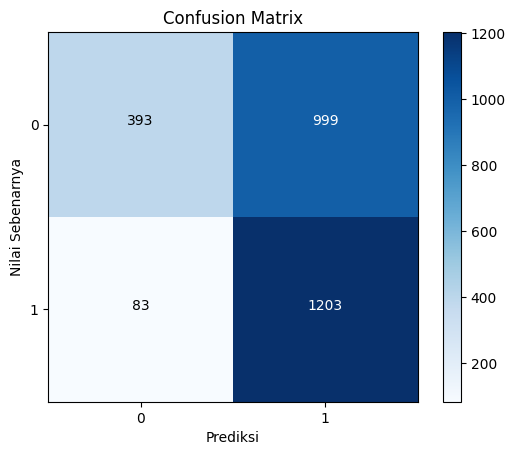

In [ ]:
# Content Based dengan oversampling
model_content_over = ann_model_not(X_train_content_over.reset_index(drop=True), y_train_content_over.reset_index(drop=True))
evaluate_model(model_content_over, X_test_content_over.reset_index(drop=True), y_test_content_over.reset_index(drop=True))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

Accuracy: 0.7488839285714286
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       671
           1       0.00      0.00      0.00       225

    accuracy                           0.75       896
   macro avg       0.37      0.50      0.43       896
weighted avg       0.56      0.75      0.64       896



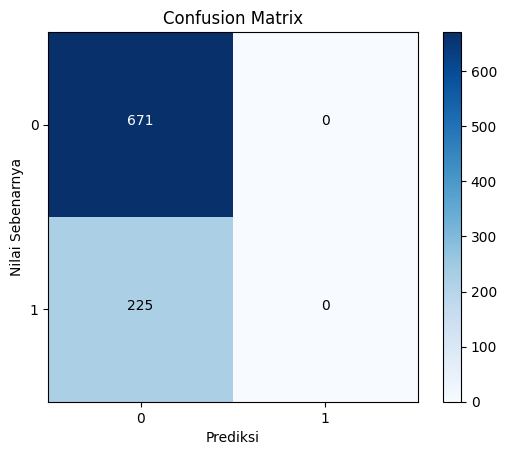

In [ ]:
# Content Based tanpa oversampling
model_content = ann_model_not(X_train_content.reset_index(drop=True), y_train_content.reset_index(drop=True))
evaluate_model(model_content, X_test_content.reset_index(drop=True), y_test_content.reset_index(drop=True))